In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pennylane.numpy as np
from entangling_dropout.pipelines.data_science.nodes import create_qnode

2022-07-06 22:51:20,907 - root - INFO - No PennyLane configuration file found.


In [3]:
params = catalog.datasets.trained_params.load()
x_train = catalog.datasets.x_values.load()
y_train = catalog.datasets.y_values.load()
x_scale = catalog.datasets.scale_x.load()
y_scale = catalog.datasets.scale_y.load()

In [4]:
qnode = create_qnode(
    wires=catalog.datasets.params__wires.load(), 
    layers=catalog.datasets.params__layers.load(), 
    shots=catalog.datasets.params__shots.load())

In [5]:
def generate_plot(x_values, y_values, y_trained, x_trained, x_scale, y_scale):
    # 100 linearly spaced numbers
    x = np.linspace(-1,1,100)

    # the function, which is y = sin(x) here
    y = np.sin(x*np.pi)

    # setting the axes at the centre
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['bottom'].set_position('center')
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # plot the function
    plt.plot(x, y, 'b--')
    plt.plot(x_values*x_scale, y_values*y_scale, 'b.')
    plt.plot(x_trained*x_scale, y_trained*y_scale, '-', color='orange')

    # show the plot
    plt.show()

In [6]:
x_trained = np.linspace(-1, 1, 100)
y_trained = np.array([qnode(x, params).unwrap()[0] for x in x_trained])

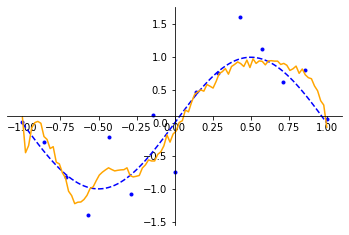

In [7]:
generate_plot(x_train, y_train, y_trained, x_trained, x_scale, y_scale)